In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.loadtxt('./data/q4x.dat')
y = np.loadtxt('./data/q4y.dat',dtype=str).reshape(-1,1)

x = (x - np.mean(x))/np.std(x)                  # Normalize

In [3]:
phi = (y == 'Alaska').sum()/float(y.shape[0])   # 'Alaska' = 1; 'Canada' = 0
mu_1 = np.sum((x*(y == 'Alaska')),axis=0)/float((y == 'Alaska').sum())
mu_0 = np.sum((x*(y == 'Canada')),axis=0)/float((y == 'Canada').sum())
sigma = np.dot((x - np.where(y == 'Alaska',mu_1,mu_0)).T,(x - np.where(y == 'Alaska',mu_1,mu_0)))/float(y.shape[0])
print(mu_0)
print(mu_1)
print(sigma)

# mu_0 = [-0.8315402, 0.74891723]
# mu_1 = [-1.10106488, 1.18368785]
# sigma = [[0.0136741, -0.00127227],
#          [-0.00127227, 0.05342744]]

[-0.8315402   0.74891723]
[-1.10106488  1.18368785]
[[ 0.0136741  -0.00127227]
 [-0.00127227  0.05342744]]


<IPython.core.display.Javascript object>


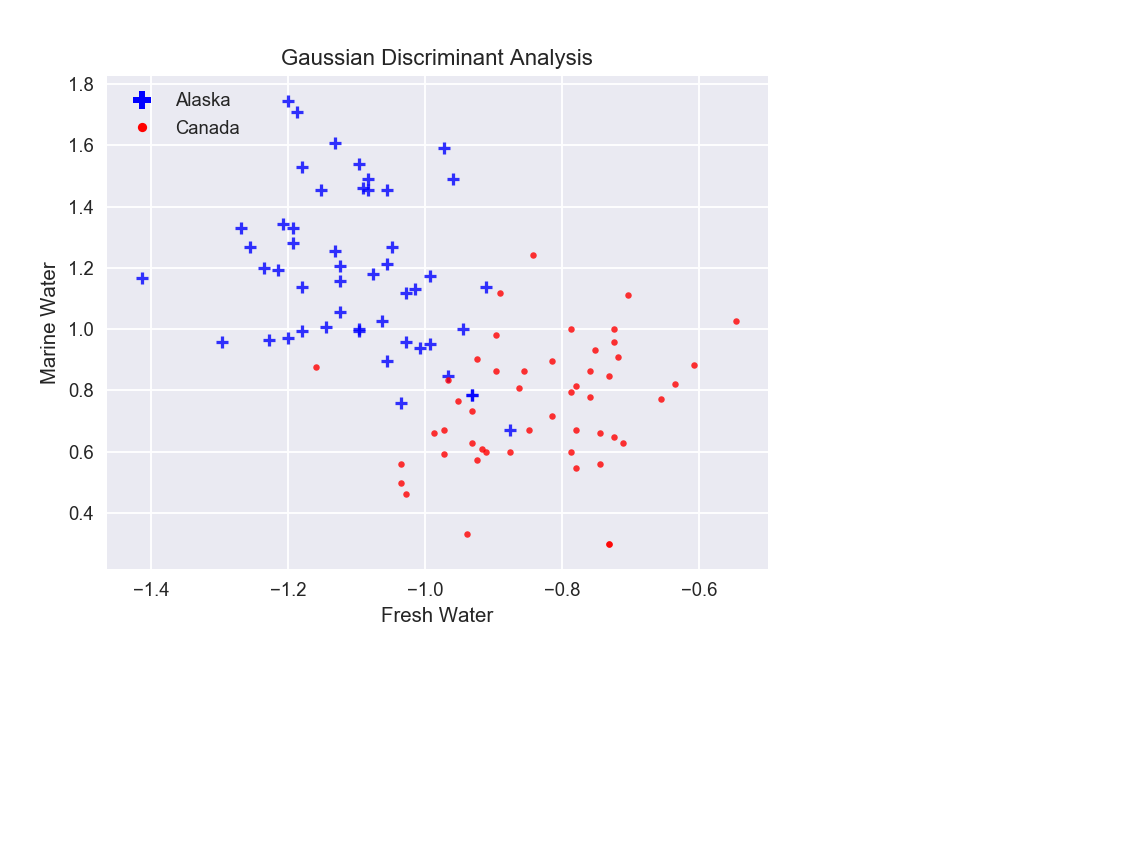

In [4]:
%matplotlib notebook

sns.set()
sns.regplot(x[(y == 'Alaska').reshape(-1,),0],x[(y == 'Alaska').reshape(-1,),1],fit_reg=False,marker='+',color='blue')
sns.regplot(x[(y == 'Canada').reshape(-1,),0],x[(y == 'Canada').reshape(-1,),1],fit_reg=False,marker='.',color='red')
plt.title("Gaussian Discriminant Analysis")
plt.xlabel("Fresh Water")
plt.ylabel("Marine Water")
neg_patch = plt.plot([],[],marker=".",ms=10,ls="",mec=None,color='red',label="Canada")[0]
pos_patch = plt.plot([],[],marker="P",ms=10,ls="",mec=None,color='blue',label="Alaska")[0]
plt.legend(handles=[pos_patch,neg_patch],loc=2)
plt.show()

<IPython.core.display.Javascript object>


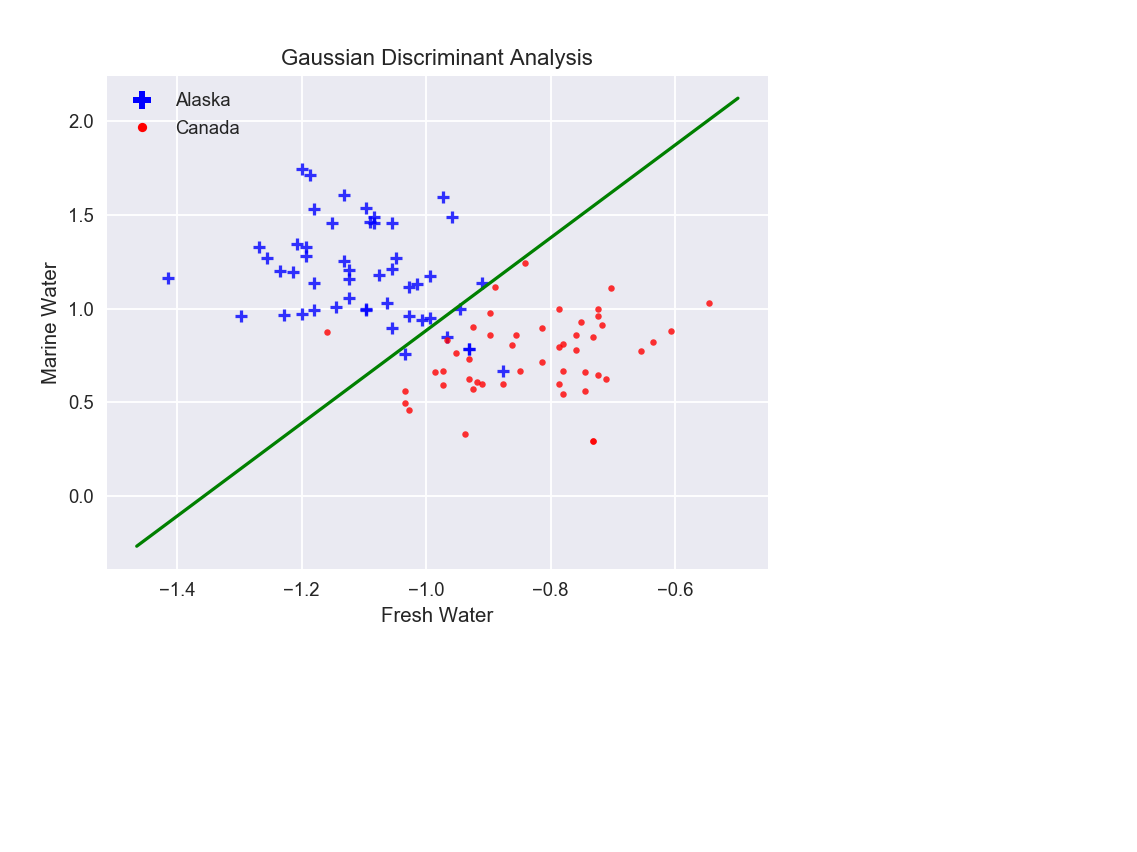

In [5]:
%matplotlib notebook

sns.set()
sns.regplot(x[(y == 'Alaska').reshape(-1,),0],x[(y == 'Alaska').reshape(-1,),1],fit_reg=False,marker='+',color='blue')
sns.regplot(x[(y == 'Canada').reshape(-1,),0],x[(y == 'Canada').reshape(-1,),1],fit_reg=False,marker='.',color='red')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
sigma_inv = np.linalg.pinv(sigma)
a = np.dot(mu_1,sigma_inv) - np.dot(mu_0,sigma_inv)
b = np.log(phi/float(1-phi)) + 0.5*(np.dot(np.dot(mu_0,sigma_inv),mu_0.T) - np.dot(np.dot(mu_1,sigma_inv),mu_1.T))
y_vals = -1*(b + a[0] * x_vals)/a[1]
plt.plot(x_vals,y_vals,color='g')
plt.title("Gaussian Discriminant Analysis")
plt.xlabel("Fresh Water")
plt.ylabel("Marine Water")
neg_patch = plt.plot([],[],marker=".",ms=10,ls="",mec=None,color='red',label="Canada")[0]
pos_patch = plt.plot([],[],marker="P",ms=10,ls="",mec=None,color='blue',label="Alaska")[0]
plt.legend(handles=[pos_patch,neg_patch],loc=2)
plt.show()

In [6]:
phi = (y == 'Alaska').sum()/float(y.shape[0])
mu_1 = np.sum((x*(y == 'Alaska')),axis=0)/float((y == 'Alaska').sum())
mu_0 = np.sum((x*(y == 'Canada')),axis=0)/float((y == 'Canada').sum())
sigma_1 = np.dot(((x - mu_1)*(y == 'Alaska')).T,(x - mu_1)*(y == 'Alaska'))/float((y == 'Alaska').sum())
sigma_0 = np.dot(((x - mu_0)*(y == 'Canada')).T,(x - mu_0)*(y == 'Canada'))/float((y == 'Canada').sum())
print(mu_0)
print(mu_1)
print(sigma_0)
print(sigma_1)

# mu_0 = [-0.8315402, 0.74891723]
# mu_1 = [-1.10106488, 1.18368785]
# sigma_0 = [[0.01520029, 0.00622316],
#            [0.00622316, 0.04163824]]
# sigma_1 = [[ 0.0121479, -0.0087677],
#            [-0.0087677, 0.06521665]]

[-0.8315402   0.74891723]
[-1.10106488  1.18368785]
[[0.01520029 0.00622316]
 [0.00622316 0.04163824]]
[[ 0.0121479  -0.0087677 ]
 [-0.0087677   0.06521665]]


<IPython.core.display.Javascript object>


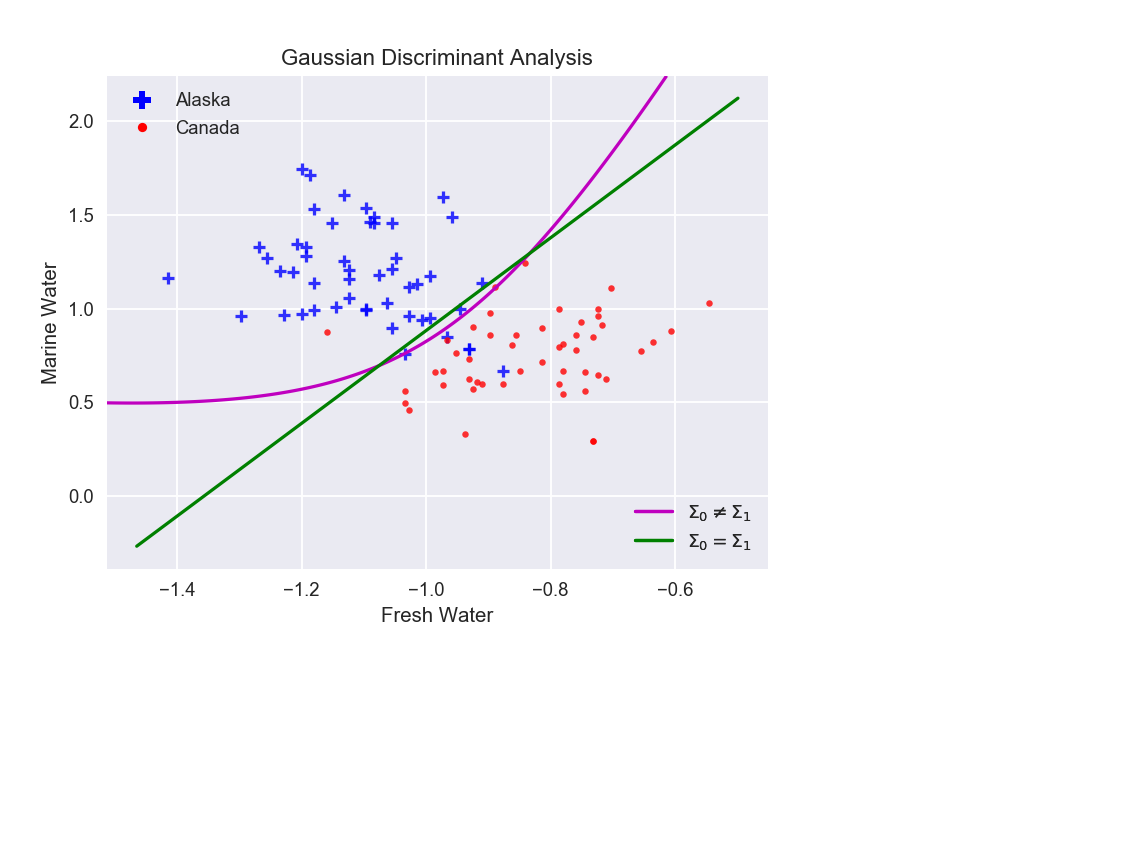

In [7]:
%matplotlib notebook

sns.set()
sns.regplot(x[(y == 'Alaska').reshape(-1,),0],x[(y == 'Alaska').reshape(-1,),1],fit_reg=False,marker='+',color='blue')
sns.regplot(x[(y == 'Canada').reshape(-1,),0],x[(y == 'Canada').reshape(-1,),1],fit_reg=False,marker='.',color='red')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
sigma_inv = np.linalg.pinv(sigma)
a = np.dot(mu_1,sigma_inv) - np.dot(mu_0,sigma_inv)
b = np.log(phi/float(1-phi)) + 0.5*(np.dot(np.dot(mu_0,sigma_inv),mu_0.T) - np.dot(np.dot(mu_1,sigma_inv),mu_1.T))
y_vals = -1*(b + a[0] * x_vals)/a[1]
plt.plot(x_vals,y_vals,color='g')
x_vals = np.array(axes.get_xlim())
y_vals = np.array(axes.get_ylim())
x1 = np.linspace(x_vals[0], x_vals[1], 400)
x2 = np.linspace(y_vals[0], y_vals[1], 400)
x1, x2 = np.meshgrid(x1, x2)
sigma_0_inv = np.linalg.pinv(sigma_0)
sigma_1_inv = np.linalg.pinv(sigma_1)
a = (sigma_1_inv - sigma_0_inv)[0,0]
b = (sigma_1_inv - sigma_0_inv)[1,0] + (sigma_1_inv - sigma_0_inv)[0,1]
c = (sigma_1_inv - sigma_0_inv)[1,1]
d = 2*(np.dot(mu_0,sigma_0_inv) - np.dot(mu_1,sigma_1_inv))[0]
e = 2*(np.dot(mu_0,sigma_0_inv) - np.dot(mu_1,sigma_1_inv))[1]
f = np.dot(np.dot(mu_1,sigma_1_inv),mu_1.T) - np.dot(np.dot(mu_0,sigma_0_inv),mu_0.T) + 2*np.log((1-phi)/float(phi)) + np.log(np.linalg.det(sigma_1)/float(np.linalg.det(sigma_0)))
plt.contour(x1,x2,(a*x1**2 + b*x1*x2 + c*x2**2 + d*x1 + e*x2 + f),[0],colors='m')
plt.title("Gaussian Discriminant Analysis")
plt.xlabel("Fresh Water")
plt.ylabel("Marine Water")
neg_patch = plt.plot([],[],marker=".",ms=10,ls="",mec=None,color='red',label="Canada")[0]
pos_patch = plt.plot([],[],marker="P",ms=10,ls="",mec=None,color='blue',label="Alaska")[0]
mag_patch = plt.plot([],[],color='m',label=r'$\Sigma_0 \neq \Sigma_1$')[0]
green_patch = plt.plot([],[],color='g',label=r'$\Sigma_0 = \Sigma_1$')[0]
axes.add_artist(plt.legend(handles=[pos_patch,neg_patch],loc=2))
axes.add_artist(plt.legend(handles=[mag_patch,green_patch],loc=4))
plt.show()